# Linear Classification

## Preamble the data set

We are using Fisher's famous <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">Iris data set</a>. The goal is to classify flowers from the Iris family into one of three species, that look as follows:

<table>
<tr>
<td> <img src="figures/iris_setosa.jpg" width="200" style="height:150px"/> </td>
<td> <img src="figures/iris_versicolor.jpg" width="200" style="height:150px"/> </td>
<td> <img src="figures/iris_virginica.jpg" width="200" style="height:150px"/> </td>
</tr>

<tr> 
<td>Iris Setosa</td>
<td>Iris Versicolor</td>
<td>Iris Virginica</td>
</tr>
</table>

Our data set contains 50 flowers from each class, thus 150 in total. There are four features, the length and width of the petal (dt. Kronblatt) and sepal (dt. Kelchblatt) in centimetres.

<img src="figures/petal_sepal.jpg" width="400" style="height:300px"/>

The data set is distributed with sci-kit learn, the only thing we have to do is to important a function and call it.

In [31]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
print(type(X))
print(X.shape)

print("First three rows of data\n {}".format(X[:3]))
print("First three labels: {}".format(y[:3]))
print(data.DESCR)

<class 'numpy.ndarray'>
(150, 4)
First three rows of data
 [[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]]
First three labels: [0 0 0]
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    peta

 Not only do we get the input matrix $X \in \mathbb{R}^{150 \times 4}$ and target $y \in \mathbb{R}^{150}$, but also meta information such as what the class labels $0, 1, 2$ stand for and what the features (i.e. columns of $X$) correspond to.

In [5]:
print(data.target_names)
print(data.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


As a first step we focus our analysis on the first two variables, the sepal length and sepal width. Since we obtain a representation of the data in two dimensions, we are able to plot it. 

In [6]:
X_2 = X[:, :2]
y_2 = y

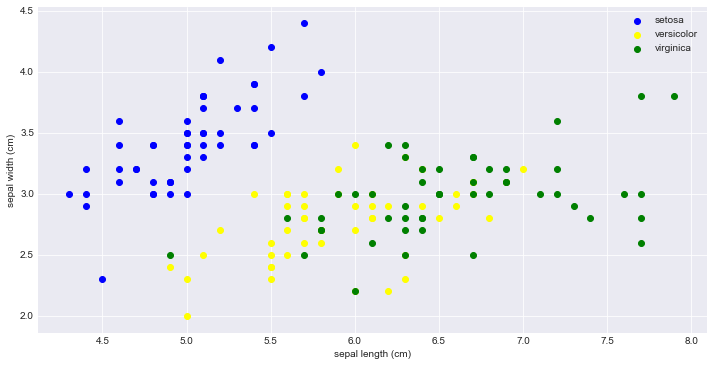

In [7]:
# Configures Jupyter to show graphics in the notebook
%matplotlib inline
import matplotlib.pyplot as plt # standard import

# We write a function so we can reuse it later.
def generate_scatter_plot(X, y):
    class_names = data.target_names
    class_colours = ['blue','yellow','green']

    fig = plt.figure(figsize=(12, 6)) # increase size of plot
    
    for i, class_colour in enumerate(class_colours):
        # plot the points only of this class label
        plt.scatter(X[y == i, 0], X[y == i, 1], c=class_colour, label=class_names[i]) 

    plt.xlabel(data.feature_names[0]) # label the axis
    plt.ylabel(data.feature_names[1])
    plt.legend(loc="best") # with legend

generate_scatter_plot(X_2, y)

## Binary Classification

We do a "setosa vs others" classification.

In [25]:
from copy import copy
y_setosa = copy(y)
y_setosa[(y == 2) | (y == 1)] = 0
y_setosa[y == 0] = 1

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y_setosa, random_state=42)

In [28]:
clf = LogisticRegression(C=1, penalty="l2")
clf.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
for i in dir(clf):
    print(i)

C
__class__
__delattr__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__getstate__
__gt__
__hash__
__init__
__init_subclass__
__le__
__lt__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__setstate__
__sizeof__
__str__
__subclasshook__
__weakref__
_estimator_type
_get_param_names
_predict_proba_lr
class_weight
classes_
coef_
decision_function
densify
dual
fit
fit_intercept
get_params
intercept_
intercept_scaling
max_iter
multi_class
n_iter_
n_jobs
penalty
predict
predict_log_proba
predict_proba
random_state
score
set_params
solver
sparsify
tol
verbose
warm_start


[[ 0.37849553  1.36818142 -2.12498513 -0.94636238]]


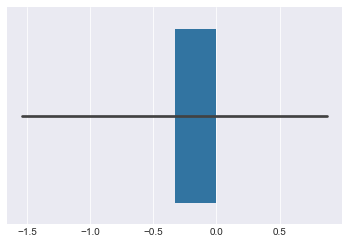

In [34]:
print(clf.coef_)
sns.barplot(clf.coef_[0])

In [12]:
print("Train-Score: %.4f, Test-Accuracy: %.4f" % (clf.score(X_train, y_train), clf.score(X_test, y_test)))

Train-Score: 1.0000, Test-Accuracy: 1.0000


## Multi-class Classification

Now try the multi-class problem. Look up the slides for the multi-class logistic regression.

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [38]:
n_samples = X_train.shape[0]

In [39]:
clf2 = LogisticRegression(multi_class="multinomial", 
                         penalty="l2",
                         random_state=42,
                         solver="newton-cg")

In [40]:
clf2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
clf2.score(X_test, y_test)

1.0

In [42]:
clf2.coef_

array([[-0.38934048,  0.91255529, -2.33449319, -0.99201695],
       [ 0.49905281, -0.30343757, -0.21356789, -0.72775436],
       [-0.10971233, -0.60911772,  2.54806108,  1.7197713 ]])

In [69]:
import matplotlib.pyplot as plt


In [ ]:
plt.bar(['a','b','c'], np.ravel(clf2.coef_), color='r')


ValueError: shape mismatch: objects cannot be broadcast to a single shape

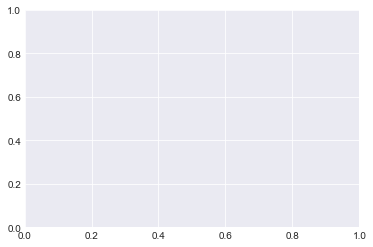

In [72]:
ind = ['a','b','c']#, np.ravel(clf2.coef_), color='r')


fig, ax = plt.subplots()
rects1 = ax.bar(ind, clf2.coef_[0])
#rects2 = ax.bar(ind, clf2.coef_[1])
#rects3 = ax.bar(ind, clf2.coef_[2])


In [70]:
vals1 = clf2.coef_[0]
print(vals1)

[-0.38934048  0.91255529 -2.33449319 -0.99201695]


In [ ]:
range()

In [54]:
list(clf2.coef_[0])

[-0.38934048327895004,
 0.9125552942477354,
 -2.3344931947097605,
 -0.99201694792189421]

<function ravel at 0x000001D0A3545510>


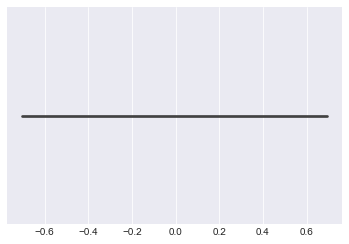

In [64]:
print(np.ravel)
sns.barplot(np.ravel(clf2.coef_))

In [52]:
sns.barplot(list(range(len(np.flatten())), clf2.coef_[0])

SyntaxError: unexpected EOF while parsing (<ipython-input-52-4324f43c0117>, line 1)

In [19]:
from sklearn.metrics import classification_report

In [20]:
report = classification_report(y_test, 
                      clf2.predict(X_test), 
                      #labels=data.feature_names,
                      target_names=data.target_names
                     )

print(report)

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        15
 versicolor       1.00      1.00      1.00        11
  virginica       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        38

